In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# importing data
data = pd.read_csv('Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.rename(columns = {'Taxable.Income':'Income'}, inplace = True)

In [5]:
data.rename(columns = {'Marital.Status':'Status'}, inplace = True)

In [6]:
data.rename(columns = {'City.Population':'Population'}, inplace = True)

In [7]:
data.rename(columns = {'Work.Experience':'Experience'}, inplace = True)

# Converting categorical data to numeric data

In [8]:
#Complete dataset
label_encoder = preprocessing.LabelEncoder()

In [9]:
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 

In [10]:
data['Status']= label_encoder.fit_transform(data['Status']) 

In [11]:
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [12]:
data.head()

,Undergrad,Status,Income,Population,Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [13]:
data = pd.DataFrame(data)

In [14]:
data.head()

,Undergrad,Status,Income,Population,Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


# Converting numeric data to categorical data for Income

In [15]:
def change_func(x):
    if x <= 30000:
        return "Risky"
    else:
        return "Good"

data["Income"] = data["Income"].apply(lambda x: change_func(x))

In [16]:
data.head()

,Undergrad,Status,Income,Population,Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


In [17]:
data = data.reindex(columns=['Undergrad','Urban', 'Status','Experience','Population','Income'])
data.head()

,Undergrad,Urban,Status,Experience,Population,Income
0,0,1,2,10,50047,Good
1,1,1,0,18,134075,Good
2,0,1,1,30,160205,Good
3,1,1,2,15,193264,Good
4,0,0,1,28,27533,Good


# EDA

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Undergrad   600 non-null    int32 
 1   Urban       600 non-null    int32 
 2   Status      600 non-null    int32 
 3   Experience  600 non-null    int64 
 4   Population  600 non-null    int64 
 5   Income      600 non-null    object
dtypes: int32(3), int64(2), object(1)
memory usage: 21.2+ KB


<AxesSubplot:>

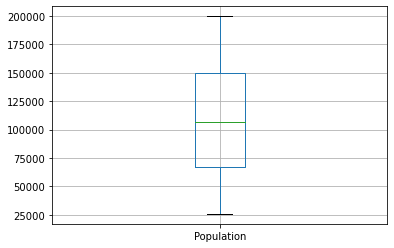

In [19]:
data.boxplot(column= ['Population'])

<AxesSubplot:>

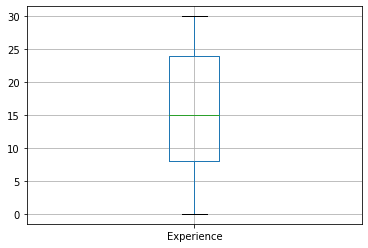

In [20]:
data.boxplot(column= ['Experience'])

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

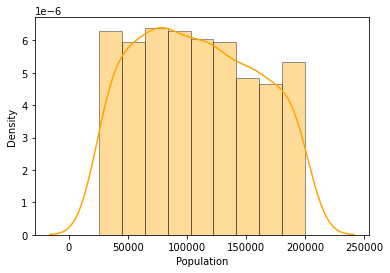

In [21]:
import seaborn as sns
sns.distplot(data['Population'], color='orange',hist_kws =dict(edgecolor = 'black'))

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

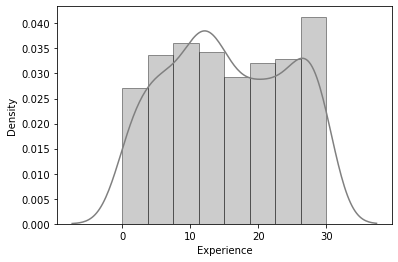

In [22]:
sns.distplot(data['Experience'], color='gray',hist_kws =dict(edgecolor = 'black'))

# Preprocessing

In [23]:
#Complete dataset
label_encoder = preprocessing.LabelEncoder()
data['Income']= label_encoder.fit_transform(data['Income']) 

In [24]:
data.head()

,Undergrad,Urban,Status,Experience,Population,Income
0,0,1,2,10,50047,0
1,1,1,0,18,134075,0
2,0,1,1,30,160205,0
3,1,1,2,15,193264,0
4,0,0,1,28,27533,0


In [25]:
x1=data.iloc[:,0:5]
y=data['Income']

In [26]:
x1

,Undergrad,Urban,Status,Experience,Population
0,0,1,2,10,50047
1,1,1,0,18,134075
2,0,1,1,30,160205
3,1,1,2,15,193264
4,0,0,1,28,27533
...,...,...,...,...,...
595,1,1,0,7,39492
596,1,1,0,2,55369
597,0,1,0,0,154058
598,1,0,1,17,180083


In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Income, Length: 600, dtype: int32

In [28]:
#Standardize data
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler().fit(x1)
x=scaler.transform(x1)

In [30]:
x

array([[-1.040833  ,  0.99335541,  1.16079994, -0.62914254, -1.17852072],
       [ 0.96076892,  0.99335541, -1.27444469,  0.27636996,  0.50850002],
       [-1.040833  ,  0.99335541, -0.05682237,  1.63463872,  1.03310911],
       ...,
       [-1.040833  ,  0.99335541, -1.27444469, -1.76103318,  0.90969648],
       [ 0.96076892, -1.00668904, -0.05682237,  0.1631809 ,  1.43219749],
       [-1.040833  , -1.00668904, -1.27444469,  0.04999184,  0.9915901 ]])

In [31]:
data['Income'].unique()

array([0, 1])

In [32]:
data.Income.value_counts()

0    476
1    124
Name: Income, dtype: int64

In [33]:
list(data.columns)

['Undergrad', 'Urban', 'Status', 'Experience', 'Population', 'Income']

# Building Decision Tree Classifier using Entropy Criteria

First

In [34]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [35]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

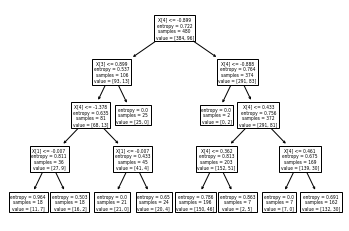

In [36]:
#PLot the decision tree
tree.plot_tree(model);

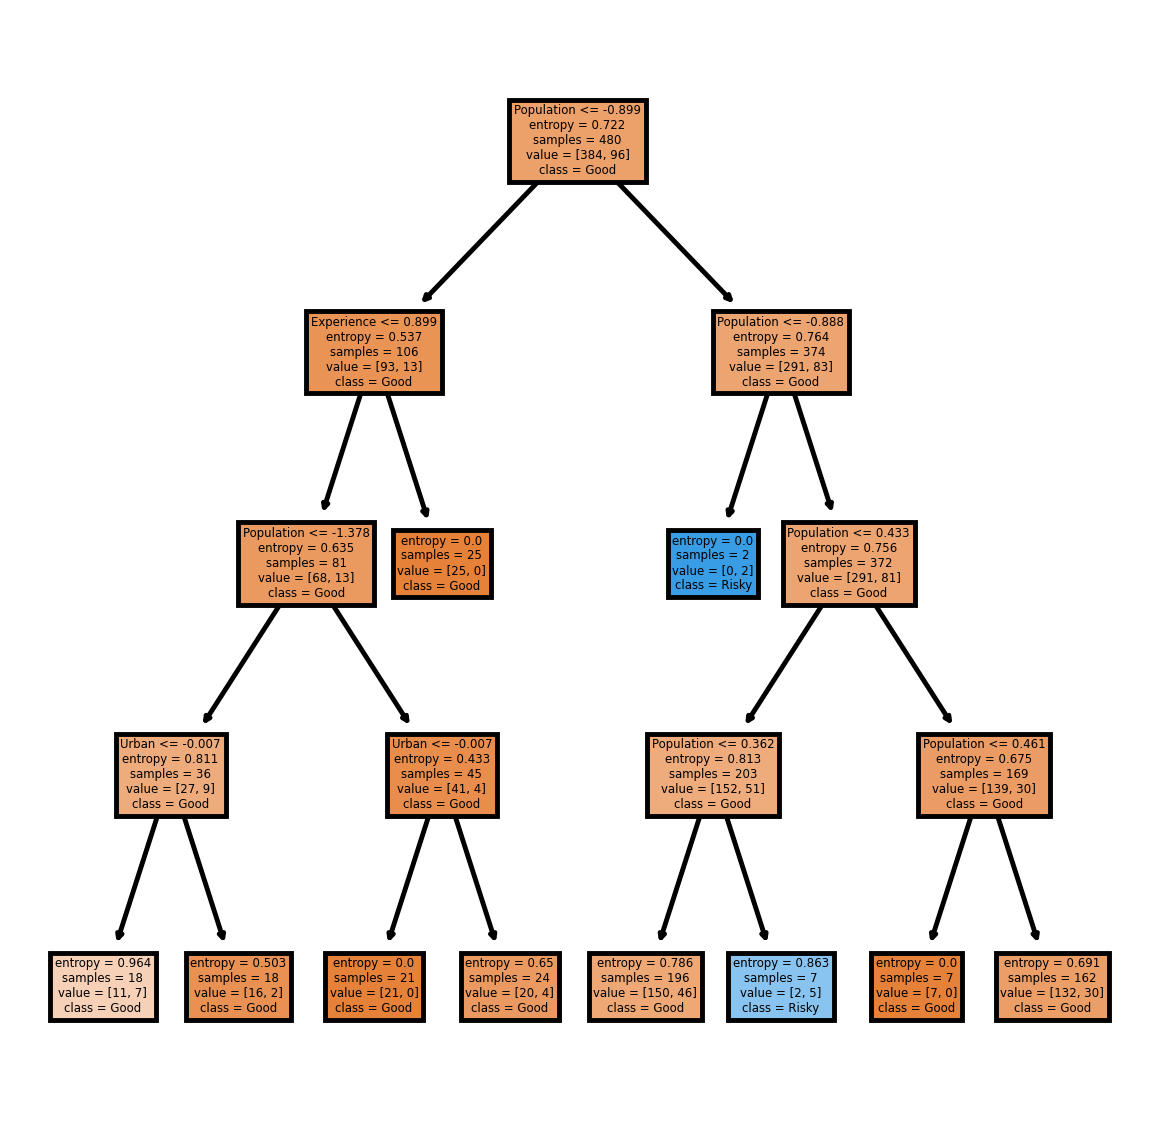

In [37]:
fn=['Undergrad', 'Urban', 'Status', 'Experience', 'Population', 'Income']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=350)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [38]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    117
1      3
dtype: int64

In [39]:
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Income,,
0,90,2
1,27,1


In [41]:
# Accuracy 
np.mean(preds==y_test)

0.7583333333333333

Second

In [42]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [43]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

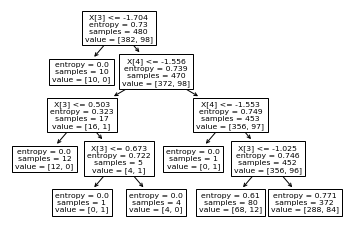

In [44]:
#PLot the decision tree
tree.plot_tree(model);

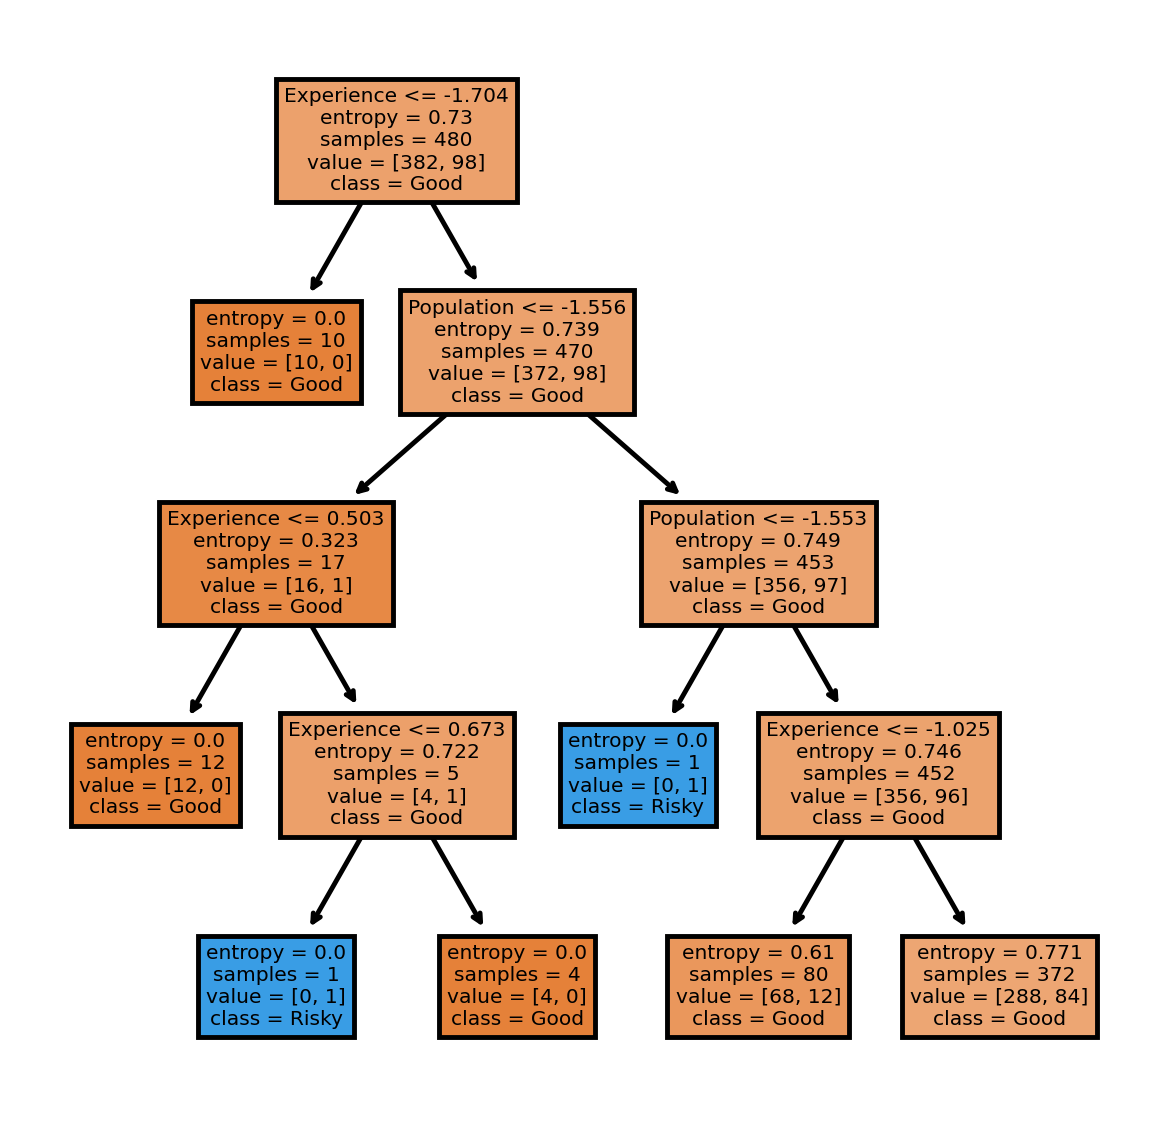

In [45]:
fn=['Undergrad', 'Urban', 'Status', 'Experience', 'Population', 'Income']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=350)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [46]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    120
dtype: int64

In [47]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0
Income,
0,94
1,26


In [49]:
# Accuracy 
np.mean(preds==y_test)

0.7833333333333333